In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/ML_ready.csv', index_col=0)

In [4]:
data.head()

,Organization,Capital Program,Program Subclass,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Project Description,Project URL,...,start,end,duration,prior,prior_requests,prior_collisions,prior_traffic,start_year,prior_collisions4,evidence
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,Stephen St Sidewalk Rehabilitation,NaN,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,612,5185.737705,2019,2448,0.0
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,"Catch basin repair, drainage improvement and p...",NaN,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,340,7113.609756,2019,1360,0.0
2,Utilities Kingston,Utilities Construction,Electrical,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,Pole line design on Bagot St. from Barrack to ...,NaN,...,2017-01-01,2017-12-31,364 days 00:00:00.000000000,2016-01-01,0,461,5992.635294,2017,461,0.0
3,Utilities Kingston,Utilities Construction,Electrical,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,Additional information to be provided by Utili...,NaN,...,2015-01-01,2015-12-31,364 days 00:00:00.000000000,2014-01-01,0,0,6430.750000,2015,0,0.0
4,Utilities Kingston,Utilties Rehabilitation,Water,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,"Watermain relining on Indian Rd, from Old Quar...",NaN,...,2018-01-01,2018-12-31,364 days 00:00:00.000000000,2017-01-01,0,289,10790.975610,2018,289,1.0


In [5]:
data.columns

Index(['Organization', 'Capital Program', 'Program Subclass', 'Project Title',
       'Project Planning From', 'Project Planning To',
       'Planned Construction From', 'Planned Construction To',
       'Project Description', 'Project URL', 'SDE ID', 'GeoJSON',
       'geo_point_2d', 'lat', 'lon', 'rect', 'start', 'end', 'duration',
       'prior', 'prior_requests', 'prior_collisions', 'prior_traffic',
       'start_year', 'prior_collisions4', 'evidence'],
      dtype='object')

In [6]:
data.Organization.value_counts()

Utilities Kingston         121
City Engineering           110
Transportation Services     52
Parks and Development       24
Transit Services             3
Other                        2
Name: Organization, dtype: int64

In [7]:
data['Program Subclass'].value_counts()

Water                                           64
Mill and Pave                                   37
Existing Parks                                  25
Wastewater                                      24
Gas                                             18
Drainage Improvements                           17
Surface Treatment                               17
New Traffic Signal                              12
Local Repair / Preventative Maintenance         11
Electrical                                      10
Sidewalk Construction                            9
Bike Lane                                        8
Sidewalk Rehabilitation                          7
Traffic Calming                                  7
Electric                                         7
Microsurfacing                                   6
New Road Construction                            5
Multi-use Pathway                                4
New Parks                                        3
Bus Pad Construction           

In [8]:
data.duration

0      364 days 00:00:00.000000000
1      364 days 00:00:00.000000000
2      364 days 00:00:00.000000000
3      364 days 00:00:00.000000000
4      364 days 00:00:00.000000000
                  ...             
142    514 days 00:00:00.000000000
143    514 days 00:00:00.000000000
144    304 days 00:00:00.000000000
145    362 days 00:00:00.000000000
152    364 days 00:00:00.000000000
Name: duration, Length: 314, dtype: object

In [9]:
data.rect.value_counts()

Rectangle(xmin=-76.55829693566604, ymin=44.188289663410536, xmax=-76.5313474659218, ymax=44.30410939668479)     90
Rectangle(xmin=-76.50651751644592, ymin=44.169986523033835, xmax=-76.47926916567926, ymax=44.29120450428031)     2
Rectangle(xmin=-76.50848622869822, ymin=44.1649296377307, xmax=-76.4769085806891, ymax=44.283498715355876)       2
Rectangle(xmin=-76.50688508675377, ymin=44.174834072220456, xmax=-76.4755413198031, ymax=44.292648299993076)     2
Rectangle(xmin=-76.50249078954734, ymin=44.17341531026234, xmax=-76.4707133790303, ymax=44.29119223013168)       2
                                                                                                                ..
Rectangle(xmin=-76.53675412698577, ymin=44.17407036538873, xmax=-76.50135033465052, ymax=44.29632519173663)      1
Rectangle(xmin=-76.54168939106106, ymin=44.17586374268532, xmax=-76.5025519640665, ymax=44.29648438177711)       1
Rectangle(xmin=-76.59355258435689, ymin=44.18265421019753, xmax=-76.565551689472

In [10]:
data.dropna(subset=['evidence'], inplace=True)

In [11]:
redux = data[['Program Subclass', 'duration', 'lat', 'lon', 'evidence']].copy()

In [12]:
redux

,Program Subclass,duration,lat,lon,evidence
0,Sidewalk Rehabilitation,364 days 00:00:00.000000000,44.242363,-76.491077,0.0
1,Local Repair / Preventative Maintenance,364 days 00:00:00.000000000,44.217985,-76.519737,0.0
2,Electrical,364 days 00:00:00.000000000,44.234198,-76.483894,0.0
3,Electrical,364 days 00:00:00.000000000,44.232736,-76.496678,0.0
4,Water,364 days 00:00:00.000000000,44.254345,-76.526951,1.0
...,...,...,...,...,...
142,Drainage Improvements,514 days 00:00:00.000000000,44.349252,-76.275727,1.0
143,Existing Parks,514 days 00:00:00.000000000,44.278976,-76.547336,0.0
144,Existing Parks,304 days 00:00:00.000000000,44.226093,-76.488902,1.0
145,Drainage Improvements,362 days 00:00:00.000000000,44.299960,-76.540277,0.0


In [13]:
import matplotlib.pyplot as plt

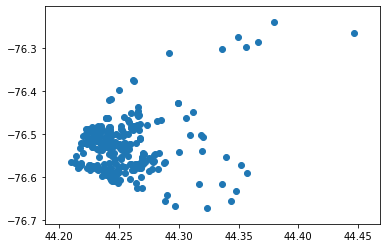

In [14]:
plt.scatter(x=redux['lat'], y=redux['lon'])
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
sse = []
k_min = 10
k_max = 20
for k in range(k_min, k_max + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(redux[['lat', 'lon']])
    sse.append(kmeans.inertia_)

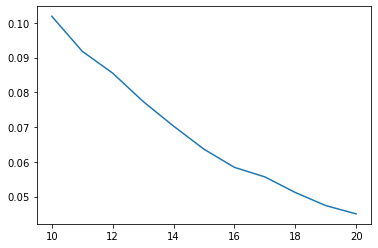

In [17]:
plt.plot(range(k_min, k_max + 1), sse)

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
sc = []
for k in range(k_min, k_max + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(redux[['lat', 'lon']])
    score = silhouette_score(redux[['lat', 'lon']], kmeans.labels_)
    sc.append(score)

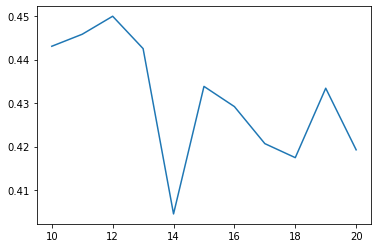

In [20]:
plt.plot(range(k_min, k_max + 1), sc)

In [21]:
k = sc.index(max(sc)) + k_min
print(k)

12


In [22]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(redux[['lat', 'lon']])

KMeans(n_clusters=12)

In [23]:
kmeans.labels_

array([ 0,  5,  0,  0,  5,  7,  5,  5,  0,  0,  8,  8,  1,  5,  8,  0,  1,
        8,  5,  0,  5,  5,  5,  8,  5,  8,  7,  9,  1,  5,  5,  0,  9,  0,
        5,  5,  1,  5,  9,  5,  8,  5,  0,  1,  1,  5,  0,  0,  0,  1,  0,
        9,  0,  7,  2,  5,  7,  8,  0,  9,  8,  7,  7,  9,  9,  9,  9,  1,
        9,  7,  7,  9,  0,  5,  1,  6,  7,  0,  5,  5,  1,  4,  8,  9,  6,
        1,  7,  0,  5,  7,  5,  5,  7,  5,  1,  5,  0,  8,  0,  1,  0,  8,
        0, 11,  6,  5,  0,  5,  0,  8,  8,  5,  8,  4,  2,  7,  7,  9,  0,
        1,  8,  8,  8,  0,  4,  1,  7,  8,  9,  5,  5,  8,  6,  9,  5,  9,
        7,  7,  0,  0,  0,  6,  3,  2,  6,  8,  1,  9,  9,  8,  4,  9,  9,
        5,  8,  5,  0,  5,  1,  5,  5,  9,  0,  1,  0,  5,  0,  9,  9,  9,
        0,  5,  5,  9,  7,  5,  5,  0,  5,  5,  9,  5,  0,  7,  0,  5,  7,
        5,  0,  5,  7,  0,  0,  9,  5,  7,  8,  5,  2,  7,  8,  9,  5,  0,
        5,  1,  5,  1,  9,  5,  7,  0,  0,  0,  5,  8,  7,  0,  5,  5,  5,
        0,  7,  5,  0, 11

In [24]:
import pickle
pickle.dump(kmeans, open('models/kmeans.pkl', 'wb'))

In [25]:
redux['centroid'] = kmeans.labels_
redux['centroid'] = redux.centroid.astype(str)

In [26]:
redux.drop(['lat', 'lon'], inplace=True, axis=1)

In [27]:
redux

,Program Subclass,duration,evidence,centroid
0,Sidewalk Rehabilitation,364 days 00:00:00.000000000,0.0,0
1,Local Repair / Preventative Maintenance,364 days 00:00:00.000000000,0.0,5
2,Electrical,364 days 00:00:00.000000000,0.0,0
3,Electrical,364 days 00:00:00.000000000,0.0,0
4,Water,364 days 00:00:00.000000000,1.0,5
...,...,...,...,...
142,Drainage Improvements,514 days 00:00:00.000000000,1.0,2
143,Existing Parks,514 days 00:00:00.000000000,0.0,7
144,Existing Parks,304 days 00:00:00.000000000,1.0,0
145,Drainage Improvements,362 days 00:00:00.000000000,0.0,4


In [28]:
redux.duration = redux.duration.map(lambda val: int(val.split(' ')[0]))
max_duration = redux.duration.max()
min_duration = redux.duration.min()
redux.duration = redux.duration.map(lambda dur: (dur - min_duration) / (max_duration - min_duration))

In [29]:
redux

,Program Subclass,duration,evidence,centroid
0,Sidewalk Rehabilitation,0.225715,0.0,0
1,Local Repair / Preventative Maintenance,0.225715,0.0,5
2,Electrical,0.225715,0.0,0
3,Electrical,0.225715,0.0,0
4,Water,0.225715,1.0,5
...,...,...,...,...
142,Drainage Improvements,0.278700,1.0,2
143,Existing Parks,0.278700,0.0,7
144,Existing Parks,0.204521,1.0,0
145,Drainage Improvements,0.225009,0.0,4


In [30]:
final = pd.get_dummies(redux).copy()

In [31]:
final.to_csv('data/final.csv', index=False)

In [32]:
final = pd.read_csv('data/final.csv')
final.head()

,duration,evidence,Program Subclass_Arterial Widening,Program Subclass_Bike Lane,Program Subclass_Bridge Construction,Program Subclass_Bus Pad Construction,Program Subclass_Crack Sealing,Program Subclass_Drainage Improvements,Program Subclass_Electric,Program Subclass_Electrical,...,centroid_10,centroid_11,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9
0,0.225715,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.225715,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.225715,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.225715,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.225715,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
